## Simple regression

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
# Import relevant modules
import pymc 
import numpy as np

In [57]:
def generateData(size, true_intercept, true_slope, order, noiseSigma):
    x = np.linspace(0, 1, size)
    # y = a + b*x
    true_y = true_intercept + true_slope * (x ** order) 
    # add noise
    y = true_y + np.random.normal(scale=noiseSigma, size=size)
    return x, y, true_y

def plotData(x, y, true_y):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
    ax.plot(x, y, 'x', label='sampled data')
    ax.plot(x, true_y, label='true regression line', lw=2.)
    plt.legend(loc=0);


### Fit linear model

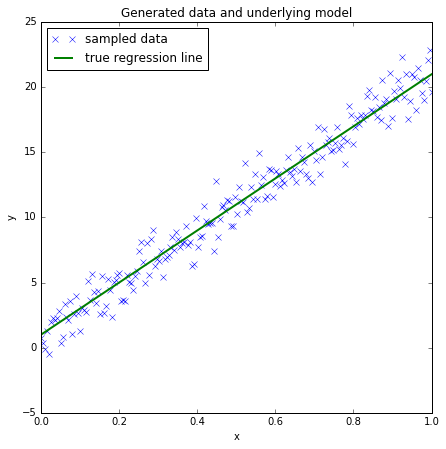

In [74]:
(x, y, true_y) = generateData(size = 200, true_intercept = 1, true_slope = 20, order = 1, noiseSigma=1.0)
plotData(x, y, true_y)

In [75]:
#Fit linear model

sigma = pymc.HalfCauchy('sigma', 10, 1.)
intercept = pymc.Normal('Intercept', 0, 1)
x_coeff = pymc.Normal('x', 0, 1)

@pymc.deterministic
def m(intercept= intercept, x_coeff=x_coeff):
    return intercept + (x ** 1) * x_coeff

likelihood = pymc.Normal(name='y', mu=m, tau=1.0/sigma, value=y, observed=True)


In [76]:
# Plot the model dependencies 
import pymc.graph
from IPython.display import display_png
graph = pymc.graph.graph(S)
display_png(graph.create_png(), raw=True)

ImportError: PyDot must be installed to use the graph function.
 PyDot is available from http://dkbza.org/pydot.html

 [-----------------100%-----------------] 10000 of 10000 complete in 1.3 secPlotting Intercept
Plotting sigma
Plotting x


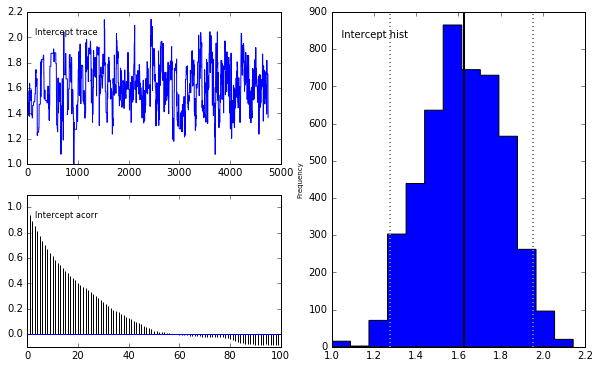

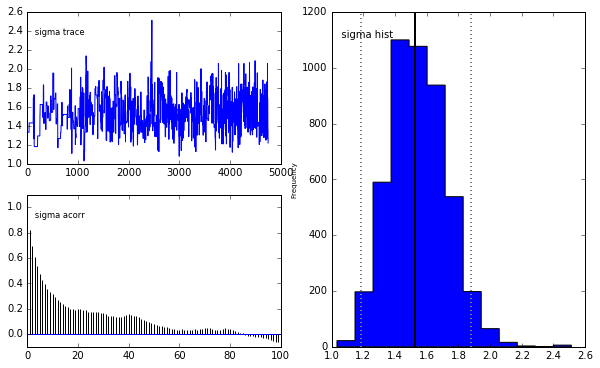

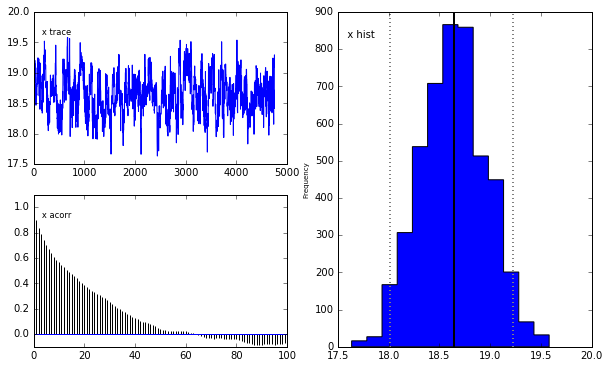

In [77]:
# Run inference 
mcmc = pymc.MCMC([likelihood, sigma, intercept, x_coeff])
mcmc.sample(iter=10000, burn=500, thin=2)
pymc.Matplot.plot(mcmc)

### Exercise fit cubic model

In [78]:
# your code here

### Model selection

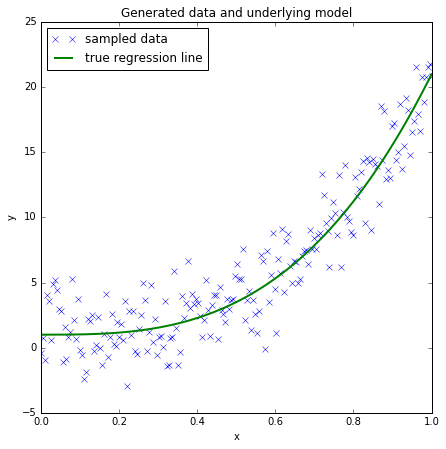

In [79]:
(x, y, true_y) = generateData(size = 200, true_intercept = 1, true_slope = 20, order = 3, noiseSigma=2.0)
plotData(x, y, true_y)

 [-----------------100%-----------------] 10000 of 10000 complete in 3.0 sec

/home/halshater/anaconda/lib/python3.4/site-packages/pymc/StepMethods.py:945: RuntimeWarning: invalid value encountered in double_scalars
  if random() > p_false / (p_true + p_false):
/home/halshater/anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:1803: RuntimeWarning: invalid value encountered in true_divide
  c /= np.sqrt(np.dot(x, x) * np.dot(y, y))


Plotting ber
Plotting Intercept
Plotting beta
Plotting x
Plotting sigma


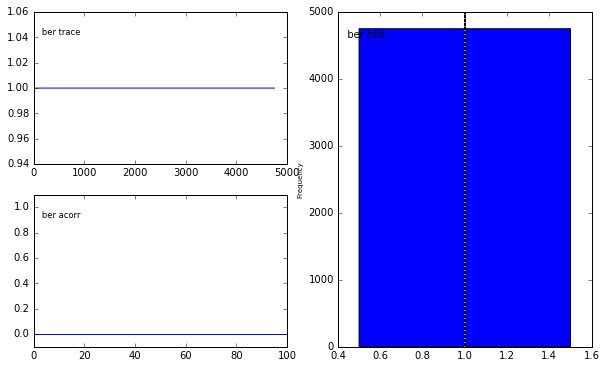

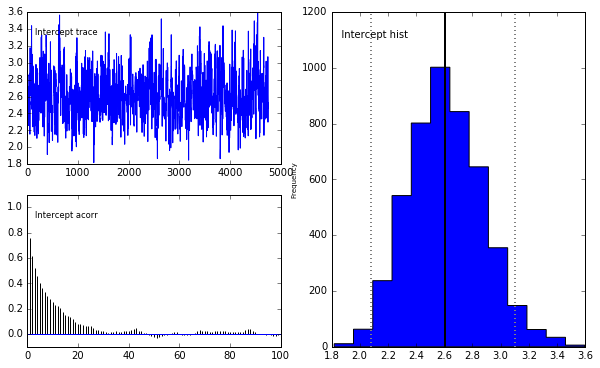

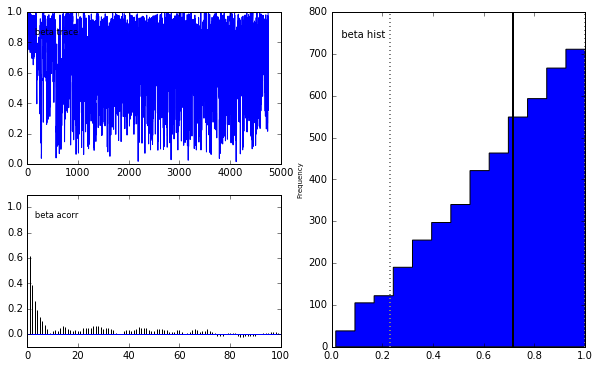

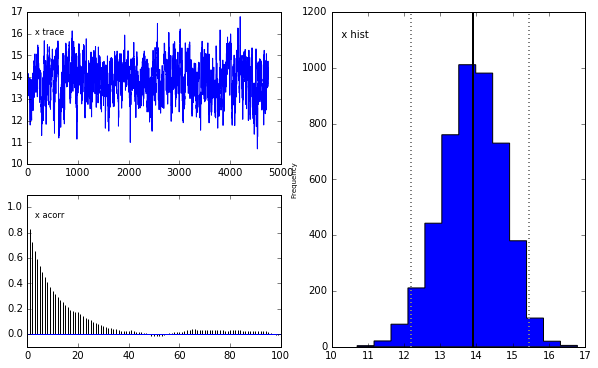

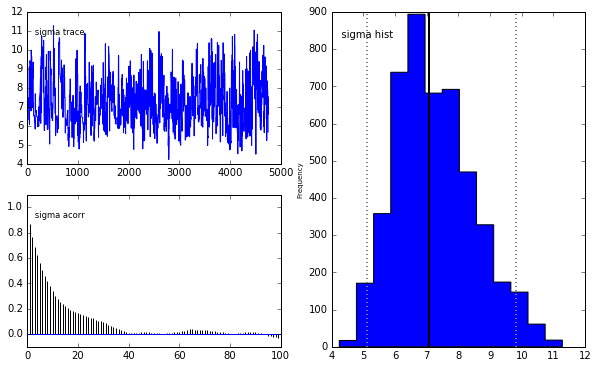

In [80]:
#Model selection

beta = pymc.Beta('beta', 1.0, 1.0)
ber = pymc.Bernoulli('ber', beta)

sigma = pymc.HalfCauchy('sigma', 10, 1.)
intercept = pymc.Normal('Intercept', 0, 1)
x_coeff = pymc.Normal('x', 0, 1)

@pymc.deterministic
def m(intercept= intercept, x_coeff=x_coeff, ber=ber):
    if ber:
        return intercept + (x ** 3) * x_coeff
    else:
        return intercept + (x ** 1) * x_coeff
likelihood = pymc.Normal(name='y', mu=m, tau=1.0/sigma, value=y, observed=True)

mcmc = pymc.MCMC([likelihood, sigma, intercept, x_coeff, beta, ber])
mcmc.sample(iter=10000, burn=500, thin=2)
pymc.Matplot.plot(mcmc)

(0, 1.5)

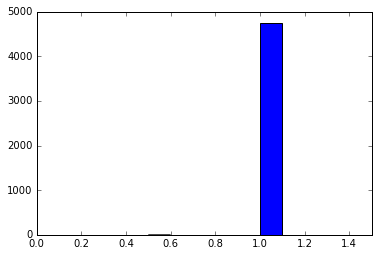

In [82]:
plt.hist(np.array(mcmc.trace("ber")[:], dtype=np.int))
plt.xlim([0, 1.5])

### Exercise: find noise effect on the model linearity

In [83]:
# your code here